# Ciele projektu

- importovanie datasetu
- analýza, úprava dát
- rozdelenie dát na trénovacie a testovacie
- vytvorenie rozhodovacieho stromu
- prevod na pravidlá
- upravenie pravidiel pre Clips
- vytvorenie použivateľského menu v Clips

V provom kroku si najprv zanalyzujeme náš dataset pomocou knižnice **pandas**. Ako tému sme si vybrali `'predpoved, že niekto dostane alebo má diabetes'`. Dataset môžeme nájsť na [tejto adrese](https://www.kaggle.com/uciml/pima-indians-diabetes-database) alebo na [gite](https://github.com/matebence/Mate_ZS2021/blob/master/diabetes.csv).  Už samotný názov témy naznačuje, že ako dáta bude musieť analyzovať zdravotný stav ľudi ako mužov aj ženy v rôznom veku.

In [1]:
# knižnice pre analýzu dát
import pandas as pd
import numpy as np

# knižnice pre získanie datasetu
import requests
import io

In [2]:
# kedže náš dataset sa už nachádza v našom git repozirátri, tak to využijeme a pomocou knižnice requests urobíme GET požiadavku na získanie datasetu
url = "https://raw.githubusercontent.com/matebence/Mate_ZS2021/master/diabetes.csv"
response = requests.get(url).content
data_frame = pd.read_csv(io.StringIO(response.decode('utf-8')))

In [3]:
# náš dataset pozostáva z 768 riadkov a 9 stľpcov, kde shape[0] predstavuje riadky a shape[1] stľpce
data_frame.shape

(768, 9)

In [4]:
# názvy stľpcov ktorými budeme pracovať
data_frame.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Vysvetlenie význam stľpcov

- `Pregnancies (Tehotenstvo)` - Počet tehotenstiev
- `Glucose (Glukóza)` - Koncentrácia glukózy v plazme
- `BloodPressure (Krvný tlak)` - Krvný tlak (mm Hg)
- `SkinThickness (Hrúbka pokožky)` - Hrúbka záhybu pokožky (mm)
- `Insulin2-Hour (Inzulín)` - 2-hodinový sérový inzulín (mu U / ml)
- `BMI (Index telesnej hmotnosti)` - Index telesnej hmotnosti (hmotnosť v kg / (výška vm) ^ 2)
- `Age (Vek)` - Vek (roky)
- `Outcome (Výsledok)` - Premenná triedy výsledku (0 alebo 1) 268 z 768 je 1, ostatné sú 0

In [5]:
# dátové typy stľpcov
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# ukážka dát
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# počet, priemer, max, min jednotlivých stľpcov
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Počet ludí ktorí majú diabetes

Najdôležitejšie časti z kódu nižšie sú:

`'data_frame.Outcome.value_counts().plot.bar'` - získanie stľpca Outcome a počet hodnout pomocou count, následne vytvoriť **stľpcový graf**<br>
`'data_frame.Outcome.value_counts().plot.pie'` - získanie stľpca Outcome a počet hodnout pomocou count, následne vytvoriť **koláčový graf**

Všetko ostatné je iba nastovanie grafu pomocou **seaborn** dokumentáciu môžeme nájsť [tu](https://seaborn.pydata.org/).

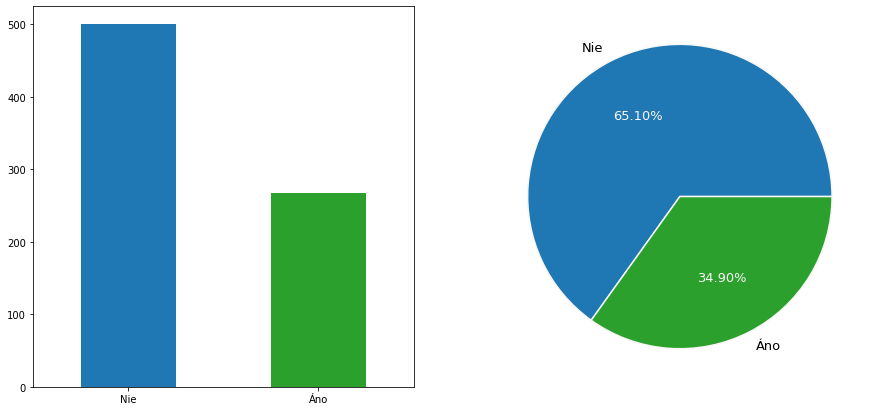

In [8]:
# knižnica pre znázornenie grafu
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize = (15, 7))
_ = data_frame.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Nie", "Áno"])
_ = data_frame.Outcome.value_counts().plot.pie(labels = ("Nie", "Áno"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

### Po analýze dát si posvietíme na správnosť dátových typov
 - Či všetky naše dáta sú numerické

In [9]:
issues = [var for var in data_frame.columns if data_frame[var].dtype=='O']
print("Problémové stľpce sú : ", issues)

Problémové stľpce sú :  []


In [10]:
#knižnice pre generovanie rozhodovacieho stromu
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
# rozdelenie dát na vstup(feature) a výstup(label)
labels=data_frame['Outcome']
features = data_frame.iloc[:,0:8]
X=features
y=np.ravel(labels)

In [12]:
#rozdelenie dát na trénovacie a testovacie v pomere 20 - 80
# rozdelenie dát na trénovacie a testovacie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101,76,48,180,32.9,0.171,63
643,4,90,0,0,0,28.0,0.610,31
275,2,100,70,52,57,40.5,0.677,25
624,2,108,64,0,0,30.8,0.158,21
459,9,134,74,33,60,25.9,0.460,81


In [14]:
#inicializujeme knižnicu pre rozhodovací strom a spustíme trénovanie dát pomocou metódy fit()
clf = DecisionTreeClassifier(max_leaf_nodes=8)
clf = clf.fit(X_train,y_train)

In [15]:
#zistíme presnosť pomocou metódy accuracy_score()
y_pred = clf.predict(X_test)
print("Presnosť:",metrics.accuracy_score(y_test, y_pred))

Presnosť: 0.7207792207792207


![Confusion matrix](https://miro.medium.com/max/445/1*Z54JgbS4DUwWSknhDCvNTQ.png)

- TP -> True Positive: Predpoklad je pozitívna hodnota a je to pravda.
- TN -> True Negative: Predpoklad je negatívna hodnota a je to pravda.
- FP -> False Positive: (Type 1 Error) Predpoklad je pozitívna hodnota ale výsledok je nepravdivý.
- FN -> False Negative: (Type 2 Error) Predpoklad je negatívna hodnota ale výsledok je nepravdivý.

In [16]:
#meranie výkonu klasifikácie strojového učenia
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[71 28]
 [15 40]]


In [17]:
#knižnice pre znázornenie rozhodovacieho stromu
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


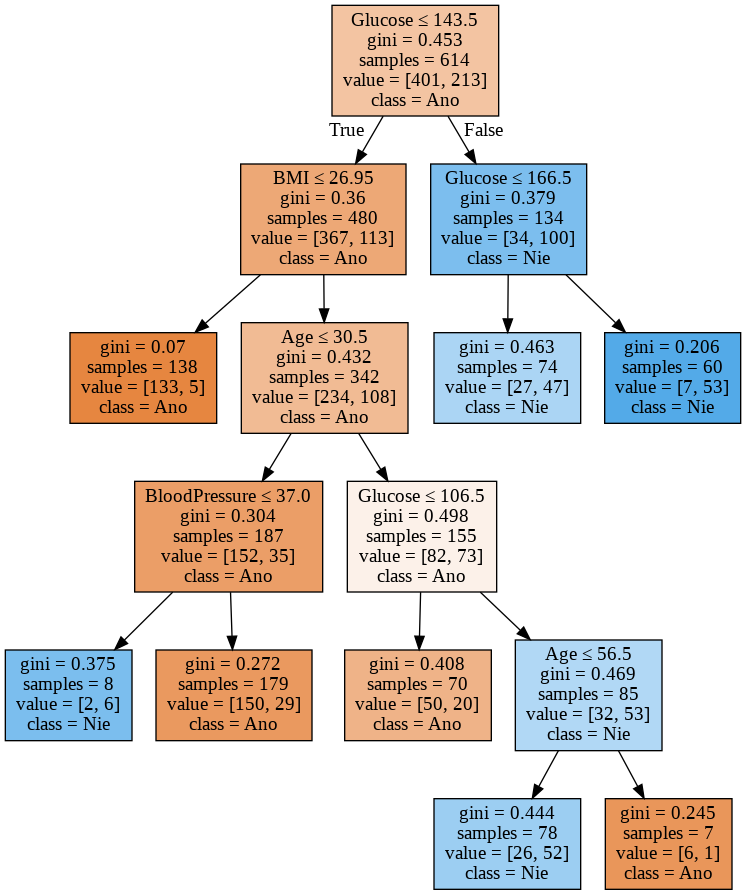

In [18]:
#generovanie rozhodovacieho stromu
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=False, special_characters=True,feature_names = list(X.columns),class_names=['Ano','Nie'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('skuska.png')
Image(graph.create_png())

In [19]:
#algoritmus služiaci na prevod pravidiel
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)

In [20]:
#výpis pravidiel
tree_to_code(clf, list(X.columns), y_train)

1 ) Glucose <= 143.5  & BMI <= 26.949999809265137  [[133.   5.]]
2 ) Glucose <= 143.5  & BMI > 26.949999809265137 & Age <= 30.5  & BloodPressure <= 37.0  [[2. 6.]]
3 ) Glucose <= 143.5  & BMI > 26.949999809265137 & Age <= 30.5  & BloodPressure > 37.0 [[150.  29.]]
4 ) Glucose <= 143.5  & BMI > 26.949999809265137 & Age > 30.5 & Glucose <= 106.5  [[50. 20.]]
5 ) Glucose <= 143.5  & BMI > 26.949999809265137 & Age > 30.5 & Glucose > 106.5 & Age <= 56.5  [[26. 52.]]
6 ) Glucose <= 143.5  & BMI > 26.949999809265137 & Age > 30.5 & Glucose > 106.5 & Age > 56.5 [[6. 1.]]
7 ) Glucose > 143.5 & Glucose <= 166.5  [[27. 47.]]
8 ) Glucose > 143.5 & Glucose > 166.5 [[ 7. 53.]]


### Využitie pravidiel v Clips
 - Teraz už iba prepíšeme pravidlá do programu Clips. Celý program možeme najsť na [tejto adrese](https://github.com/matebence/Mate_ZS2021/blob/master/diabetes.clp).